<a href="https://colab.research.google.com/github/koiralakp5/AFM_Krishna/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from tifffile import imread
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [30]:
import cv2
from google.colab.patches import cv2_imshow

Image shape (2048, 2048, 3)
Normalized to min: 0.0, max: 1.0


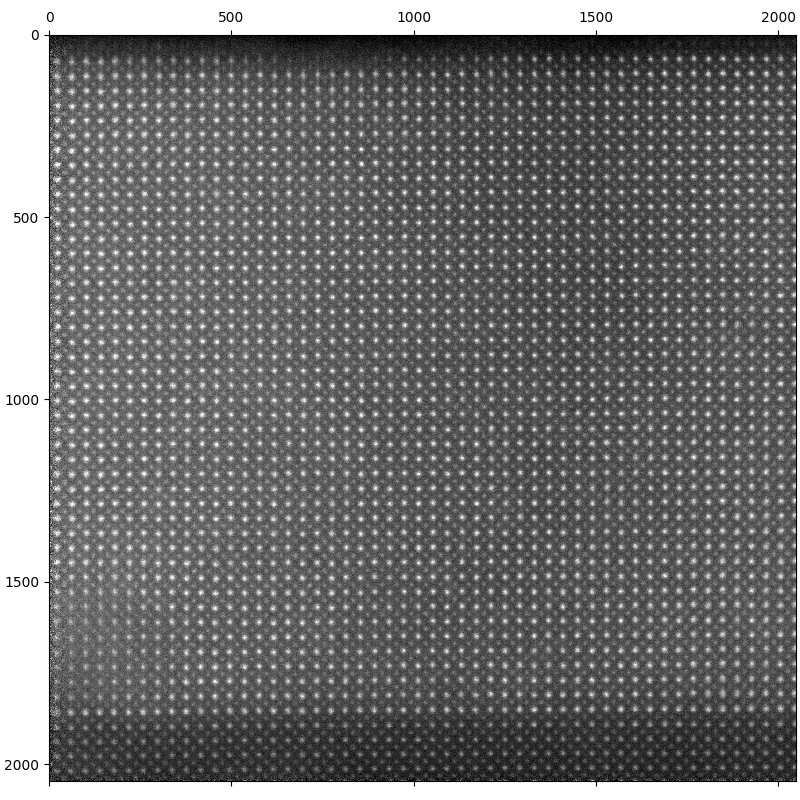

In [80]:
image = cv2.imread('LFO_STO_2 (1).tif')
print(f'Image shape {image.shape}')
#image = image[:min(image.shape),:min(image.shape)]
#print(f'Cropped to {image.shape}')
image = image - image.min()
image = image / image.max()
print(f'Normalized to min: {image.min()}, max: {image.max()}')
fig,ax = plt.subplots(1,1,constrained_layout=True,figsize=(8,8))
ax.matshow(image,cmap='gray')

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

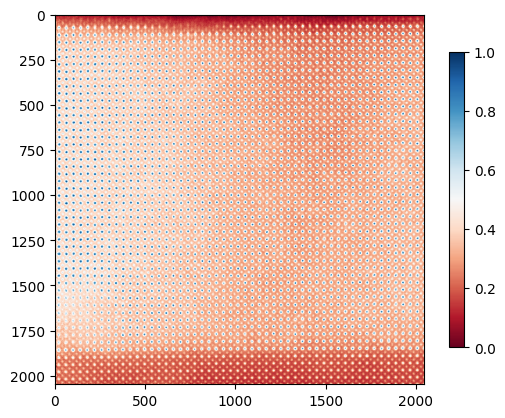

In [68]:
if image is None:
    print("Error: Could not open or find the image.")
else:
    # Ensure the image is in a compatible format (e.g., float32) and normalize
    if image.dtype == np.uint8:
        image = image.astype(np.float32) / 255.0
    elif image.dtype == np.float64:
        image = image.astype(np.float32)
        image = (image - image.min()) / (image.max() - image.min()) # Normalize to [0, 1]

    # Convert BGR to RGB (if necessary - might already be in RGB)
    if image.shape[-1] == 3:  # Check if it's a color image
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image_rgb = image  # Assume it's already in grayscale

    # Display the image with RdBu colormap applied to grayscale
    fig, ax = plt.subplots()
    cax = ax.imshow(image_rgb[:,:,0], cmap='RdBu')  # Use first channel (red) with RdBu
    fig.colorbar(cax, shrink=0.8)

    plt.show()


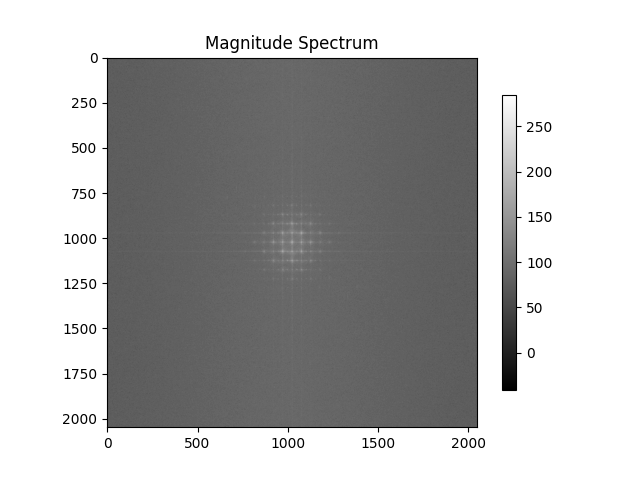

In [79]:
f = np.fft.fft2(image_rgb[:,:,0])
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Display the Fourier pattern
fig, ax = plt.subplots()
cax = ax.imshow(magnitude_spectrum, cmap='gray')
fig.colorbar(cax, shrink=0.8)
plt.title('Magnitude Spectrum')
plt.show()

In [78]:
import ipywidgets as widgets
from IPython.display import display

# Calculate the Fourier Transform (same as before)
f = np.fft.fft2(image_rgb[:,:,0])
fshift = np.fft.fftshift(f)
log_magnitude_spectrum = np.log(np.abs(fshift) + 1e-10)

# Create sliders for brightness and contrast
brightness_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=0.1, description='Brightness:')
contrast_slider = widgets.FloatSlider(value=1, min=0.1, max=3, step=0.1, description='Contrast:')

# Function to update the image display based on slider values
def update_image(brightness, contrast):
    adjusted_image = contrast * log_magnitude_spectrum + brightness
    fig, ax = plt.subplots()
    cax = ax.imshow(adjusted_image, cmap='gray')
    fig.colorbar(cax, shrink=0.8)
    plt.title('Adjusted Log-Magnitude Spectrum')
    plt.show()

# Interactive widget
widgets.interact(update_image, brightness=brightness_slider, contrast=contrast_slider)

interactive(children=(FloatSlider(value=0.0, description='Brightness:', max=2.0, min=-2.0), FloatSlider(value=…

<function __main__.update_image(brightness, contrast)>

Text(0.5, 1.0, 'Log-Magnitude Spectrum - Click to Select Peaks')

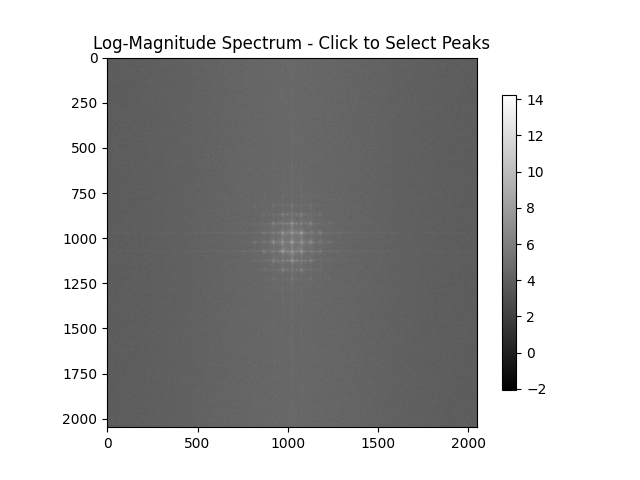

In [77]:
import ipympl
import matplotlib.pyplot as plt
%matplotlib widget

# Calculate the Fourier Transform (same as before)
f = np.fft.fft2(image_rgb[:,:,0])
fshift = np.fft.fftshift(f)
log_magnitude_spectrum = np.log(np.abs(fshift) + 1e-10)

# Display the initial FFT pattern
fig, ax = plt.subplots()
cax = ax.imshow(log_magnitude_spectrum, cmap='gray')
fig.colorbar(cax, shrink=0.8)
plt.title('Log-Magnitude Spectrum - Click to Select Peaks')
